In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap


In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\pythonProject\B_Cancer_data.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [6]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.drop(['Unnamed: 32','id'],inplace = True, axis  = 1)

In [10]:
print(df.head(10))

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   
6         M        18.25         19.98          119.60     1040.0   
7         M        13.71         20.83           90.20      577.9   
8         M        13.00         21.82           87.50      519.8   
9         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2        

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

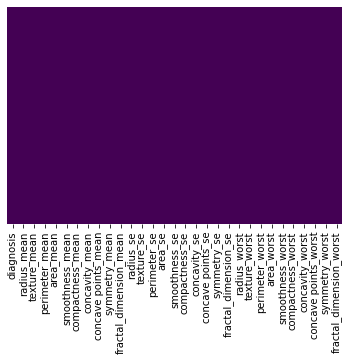

In [13]:
sn.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


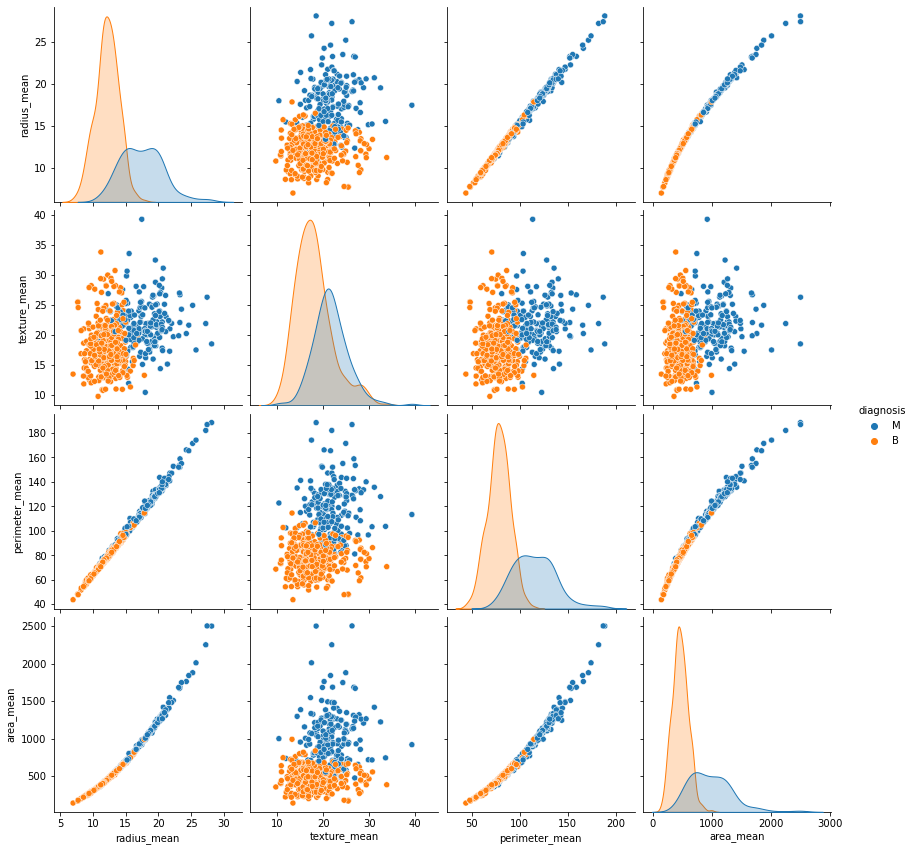

In [20]:
sn.pairplot(data= df ,hue = 'diagnosis' ,vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 
        'area_mean'], size= 3)
plt.show()

In [25]:
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [45]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['diagnosis'],axis = 1)
Y= df['diagnosis']


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = .30 , random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
train_score = []
test_score = []
for i in range (1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled,y_train)
    A = knn.score(X_train_scaled,y_train)
    B = knn.score(X_test_scaled,y_test)
    train_score.append (A)
    test_score.append (B)
    

In [52]:
print(train_score)

[1.0, 0.9773869346733668, 0.9824120603015075, 0.9698492462311558, 0.9723618090452262, 0.9723618090452262, 0.9723618090452262, 0.9698492462311558, 0.9673366834170855, 0.9673366834170855, 0.9723618090452262, 0.964824120603015, 0.9673366834170855, 0.9597989949748744, 0.9597989949748744, 0.957286432160804, 0.9623115577889447, 0.9597989949748744, 0.9673366834170855]


In [53]:
print(test_score)

[0.935672514619883, 0.9415204678362573, 0.935672514619883, 0.9473684210526315, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9532163742690059, 0.9649122807017544, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9532163742690059, 0.9473684210526315, 0.9473684210526315, 0.9415204678362573]


In [55]:
max_train_score  = max(train_score)
train_score_ind = [i for i , v in enumerate(train_score) if v== max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_score_ind))))

Max train score 100.0 % and k = [1]


In [57]:
max_test_score  = max(test_score)
test_score_ind = [i for i , v in enumerate(test_score) if v== max_test_score]
print('Max train score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_ind))))

Max train score 96.49122807017544 % and k = [9]


C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


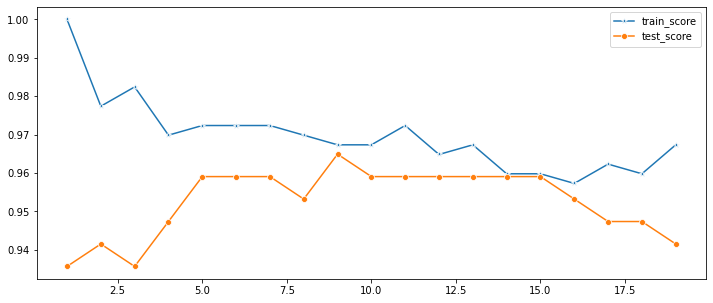

In [59]:
plt.figure(figsize=(12,5))
p= sn.lineplot(range(1,20),train_score,marker= '*',label='train_score')
p= sn.lineplot(range(1,20),test_score,marker= 'o',label='test_score')


In [62]:
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
P= confusion_matrix(y_test,Y_pred)
print(P)

[[  0 108]
 [  0  63]]


In [64]:
pd.crosstab(y_test,Y_pred, rownames=['True'],colnames= ['Predicted'],margins = True)

Predicted,1,All
True,,
0,108,108
1,63,63
All,171,171


Text(0.5, 15.0, 'Predicted label')

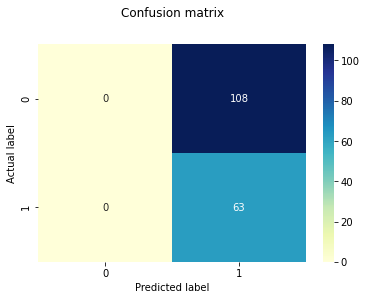

In [65]:
h= sn.heatmap(pd.DataFrame(P), annot = True , cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.37      1.00      0.54        63

    accuracy                           0.37       171
   macro avg       0.18      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
